<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA Project-Conutry Selection for(Help International)

## About PCA:

###Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and statistics. Its primary goal is to transform a high-dimensional dataset into a lower-dimensional form while retaining as much of the original variability as possible. PCA achieves this by identifying and capturing the principal components of the data.

###PCA is a linear technique focused on capturing variance, t-SNE and UMAP are nonlinear techniques designed for visualization, and LDA is a linear method with a strong connection to classification tasks. Each method has its strengths and is suited to different types of data and analysis goals.

###1-PCA (Principal Component Analysis): PCA is a linear dimensionality reduction method. It identifies the linear combinations of the original features that capture the most variance in the data. While it is powerful and widely used, PCA might not capture complex nonlinear relationships in the data.

###2-t-SNE (t-Distributed Stochastic Neighbor Embedding): t-SNE is a nonlinear dimensionality reduction technique that is particularly useful for visualizing high-dimensional data in lower-dimensional space. It aims to preserve pairwise similarities between data points. t-SNE is often used for exploratory data analysis and visualization.

###3-UMAP (Uniform Manifold Approximation and Projection): UMAP is another nonlinear dimensionality reduction technique that, like t-SNE, is effective for visualizing high-dimensional data. UMAP has gained popularity for its scalability and ability to capture both global and local structures in the data.

###4-LDA (Linear Discriminant Analysis): LDA is primarily a linear method used for dimensionality reduction, but it is closely associated with classification. It aims to maximize the separation between different classes in the data. LDA is commonly used in a supervised learning setting for tasks like classification and pattern recognition.

## About Dataset:

Description of the data set

Here we use data from

 "https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv"


1-child_mort: Death of children under 5 years of age per 1000 live births

2-exports: Exports of goods and services per capita. Given as %age of the GDP per capita

3-health: Total health spending per capita. Given as %age of GDP per capita

4-imports: Imports of goods and services per capita. Given as %age of the GDP per capita

5-Income: Net income per person

6-Inflation: The measurement of the annual growth rate of the Total GDP

7-life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

8-total_fer The number of children that would be born to each woman if the current age-fertility rates remain the same.

9-gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.




## Import Libraries


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

## Get Dataset

In [48]:
df = pd.read_csv('Country-data.csv')

## EDA

In [49]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [50]:
df.shape

(167, 10)

In [51]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [52]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [54]:
df.dtypes.value_counts()

float64    7
int64      2
object     1
dtype: int64

In [55]:
# remove country column
df = df.drop('country',axis=1)

In [56]:
# float 64 -----> float 32
# it can be useful,for reducing the memory in big datasets.
for column in df:
  df[column]= df[column].astype(np.float32)

## Visualization

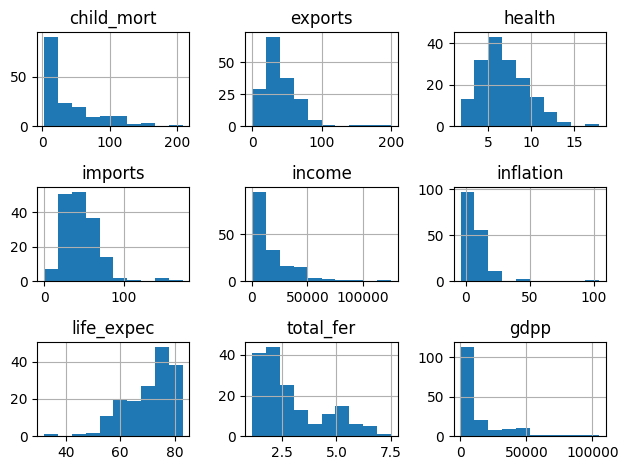

In [57]:
df.hist()
plt.tight_layout();

## Transform Skewed Features

In [58]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[df.columns].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
inflation,5.154049
exports,2.445824
income,2.231480
gdpp,2.218051
imports,1.905276
child_mort,1.450774
total_fer,0.967092
life_expec,-0.970996


In [59]:
# Perform the skew transformation:
for col in skew_cols.index.values:
    df[col] = df[col].apply(np.log1p)

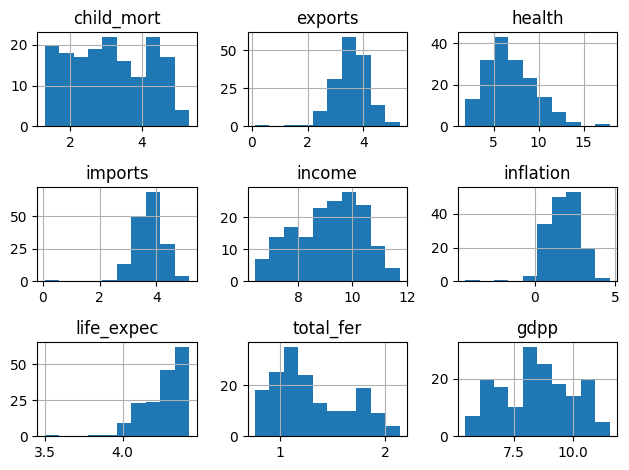

In [60]:
df.hist()
plt.tight_layout();

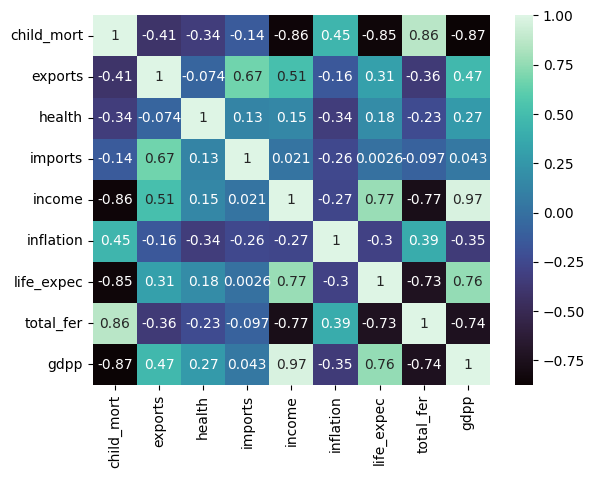

In [61]:
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap='mako');

In [62]:
for x in range(len(df.columns)):
    corr.iloc[x,x] = 0.0

corr.idxmax()

child_mort     total_fer
exports          imports
health              gdpp
imports          exports
income              gdpp
inflation     child_mort
life_expec        income
total_fer     child_mort
gdpp              income
dtype: object

## Scale

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
mms =MinMaxScaler()

In [65]:
df = mms.fit_transform(df)

In [66]:
df = pd.DataFrame(df, columns =['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'] )

In [67]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     4
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Clean Data

In [73]:
df_arr=np.array(df)

In [76]:
# fill NaN values with 0.0
X = np.nan_to_num(df_arr, nan=0.0)

## PCA

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA()

In [79]:
pca.fit(X)

PCA()

In [80]:
# show the information percentage of each feature
print(np.round(pca.explained_variance_ratio_ * 100, 2))

[70.17  9.09  6.27  5.83  4.41  2.44  1.02  0.55  0.2 ]


In [81]:
# show the inportance of each feature
print(pca.singular_values_)

[6.4166713  2.3093657  1.9185679  1.8499223  1.6089057  1.1974955
 0.7739069  0.56919044 0.34636554]


## Elbow Plot

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'PC1'),
  Text(1, 0, 'PC2'),
  Text(2, 0, 'PC3'),
  Text(3, 0, 'PC4'),
  Text(4, 0, 'PC5'),
  Text(5, 0, 'PC6'),
  Text(6, 0, 'PC7'),
  Text(7, 0, 'PC8'),
  Text(8, 0, 'PC9')])

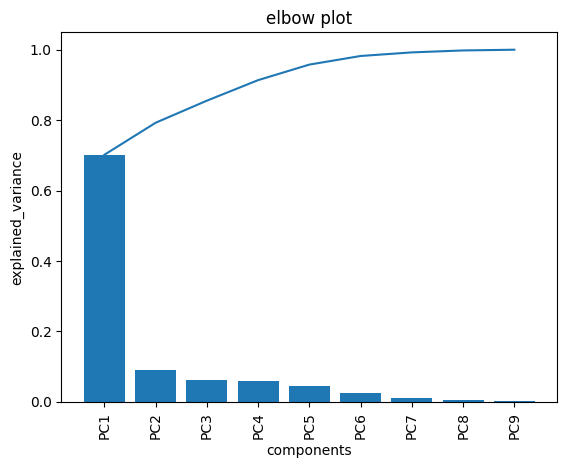

In [82]:
PC_list = ['PC'+str(i+1) for i in range(9)]
plt.bar(PC_list, pca.explained_variance_ratio_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=90)

## Evaluation of Elbow Plot

In [83]:
# show accumulation of importance for each feature
print('explained var with first PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[0] * 100, 2))
print('explained var with first 2 PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[1] * 100, 2))
print('explained var with first 3 PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[2] * 100, 2))
print('explained var with first 4 PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[3] * 100, 2))
print('explained var with first 5 PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[4] * 100, 2))

explained var with first PC:  70.17
explained var with first 2 PC:  79.26
explained var with first 3 PC:  85.53
explained var with first 4 PC:  91.37
explained var with first 5 PC:  95.78


In [84]:
# show accumulation of importance for all feature
total_var = np.cumsum(pca.explained_variance_ratio_) * 100

for i in range(9):
    print("PC {:2d}, explained var: {:.2f}".format(i+1, total_var[i]))

PC  1, explained var: 70.17
PC  2, explained var: 79.26
PC  3, explained var: 85.53
PC  4, explained var: 91.37
PC  5, explained var: 95.78
PC  6, explained var: 98.22
PC  7, explained var: 99.24
PC  8, explained var: 99.80
PC  9, explained var: 100.00


## Scatter Plot

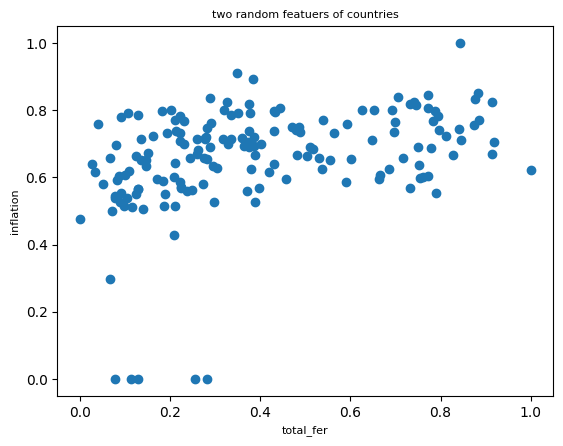

In [85]:
plt.scatter(X[:,7], X[:,5])
plt.title('two random featuers of countries', fontsize=8)
plt.xlabel('total_fer', fontsize=8)
plt.ylabel('inflation', fontsize=8);

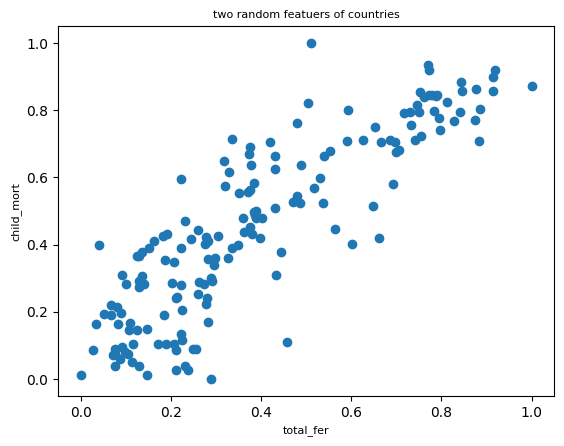

In [87]:
plt.scatter(X[:,7], X[:,0])
plt.title('two random featuers of countries', fontsize=8)
plt.xlabel('total_fer', fontsize=8)
plt.ylabel('child_mort', fontsize=8);

## PCA with n_components = 2

In [89]:
pca_2 = PCA(n_components= 2 , random_state= 101)

In [90]:
pca_2.fit(X)

PCA(n_components=2, random_state=101)

In [92]:
# show the information percentage of each feature
print(np.round(pca_2.explained_variance_ratio_ * 100, 2))

[70.17  9.09]


In [93]:
# show the inportance of each feature
print(pca_2.singular_values_)

[6.4166713 2.3093657]


In [95]:
X_2 = pca_2.transform(X)

## Scatter Plot

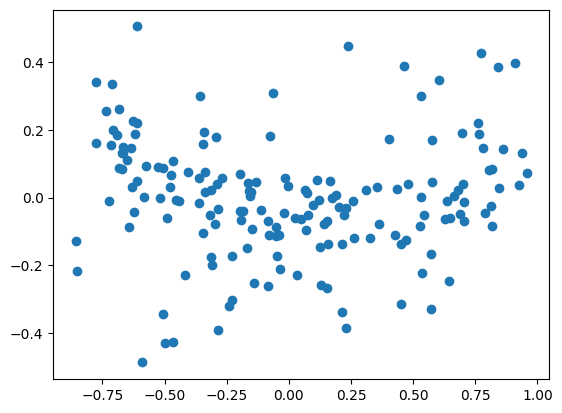

In [97]:
plt.scatter(X_2[:,0], X_2[:,1]);